In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import os
import tweepy
import json
import time
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


### Data Gathering

In [2]:
twitter_archive= pd.read_csv("twitter-archive-enhanced (2).csv")
twitter_archive.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [3]:
r = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")

In [4]:
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(r.content)
image_prediction= pd.read_csv("image-predictions.tsv", sep='\t')

In [5]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
key = "XXX"
key_secret = "XXX"
token = "XXX"
token_secret = "XXX"

auth = tweepy.OAuthHandler(key, key_secret)
auth.set_access_token(token, token_secret)

api = tweepy.API(auth)

In [9]:
tweet_ids = list(twitter_archive.tweet_id)

tweet_data = {}
for tweet in tweet_ids:
    try:
        tweet_status = api.get_status(tweet, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
        tweet_data[str(tweet)] = tweet_status._json
    except:
        print("Error for: " + str(tweet))


Error for: 888202515573088257
Error for: 873697596434513921
Error for: 872668790621863937
Error for: 872261713294495745
Error for: 869988702071779329
Error for: 866816280283807744
Error for: 861769973181624320
Error for: 856602993587888130
Error for: 851953902622658560
Error for: 845459076796616705
Error for: 844704788403113984
Error for: 842892208864923648
Error for: 837366284874571778
Error for: 837012587749474308
Error for: 829374341691346946
Error for: 827228250799742977
Error for: 812747805718642688
Error for: 802247111496568832
Error for: 779123168116150273
Error for: 775096608509886464
Error for: 771004394259247104
Error for: 770743923962707968
Error for: 759566828574212096
Rate limit reached. Sleeping for: 741
Error for: 754011816964026368
Error for: 680055455951884288
Rate limit reached. Sleeping for: 741


In [10]:
with open('tweet_json.txt', 'w') as file:
    json.dump(tweet_data, file)

In [11]:
with open('tweet_json.txt') as file:
    data = json.load(file)
    
df_list = []

for tweet_id in data.keys():
    retweets = data[tweet_id]['retweet_count']
    favorites = data[tweet_id]['favorite_count']
    df_list.append({'tweet_id': tweet_id,
                        'retweets': retweets,
                        'favorites': favorites})
    
tweets_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweets', 'favorites'])
tweets_df.head(30)

,tweet_id,retweets,favorites
0,892420643555336193,7484,35437
1,892177421306343426,5551,30653
2,891815181378084864,3678,23060
3,891689557279858688,7657,38733
4,891327558926688256,8262,36991
5,891087950875897856,2765,18645
6,890971913173991426,1796,10838
7,890729181411237888,16748,59710
8,890609185150312448,3819,25666
9,890240255349198849,6503,29299


### Assessment

In [12]:
twitter_archive.shape

(2356, 17)

In [13]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
sum(twitter_archive.duplicated())

0

In [16]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [17]:
image_prediction.shape

(2075, 12)

In [18]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
sum(image_prediction.duplicated())

0

In [20]:
image_prediction.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [21]:
image_prediction.tail(30)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2045,886366144734445568,https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg,1,French_bulldog,0.999201,True,Chihuahua,0.000361,True,Boston_bull,0.000076,True
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2047,886736880519319552,https://pbs.twimg.com/media/DE5Se8FXcAAJFx4.jpg,1,kuvasz,0.309706,True,Great_Pyrenees,0.186136,True,Dandie_Dinmont,0.086346,True
2048,886983233522544640,https://pbs.twimg.com/media/DE8yicJW0AAAvBJ.jpg,2,Chihuahua,0.793469,True,toy_terrier,0.143528,True,can_opener,0.032253,False
2049,887101392804085760,https://pbs.twimg.com/media/DE-eAq6UwAA-jaE.jpg,1,Samoyed,0.733942,True,Eskimo_dog,0.035029,True,Staffordshire_bullterrier,0.029705,True
2050,887343217045368832,https://pbs.twimg.com/ext_tw_video_thumb/88734...,1,Mexican_hairless,0.330741,True,sea_lion,0.275645,False,Weimaraner,0.134203,True
2051,887473957103951883,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False
2053,887705289381826560,https://pbs.twimg.com/media/DFHDQBbXgAEqY7t.jpg,1,basset,0.821664,True,redbone,0.087582,True,Weimaraner,0.026236,True
2054,888078434458587136,https://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg,1,French_bulldog,0.995026,True,pug,0.000932,True,bull_mastiff,0.000903,True


In [22]:
tweets_df.shape

(2331, 3)

In [23]:
sum(tweets_df.duplicated())

0

In [24]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id     2331 non-null object
retweets     2331 non-null int64
favorites    2331 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


In [25]:
tweets_df.isnull().sum()

tweet_id     0
retweets     0
favorites    0
dtype: int64

In [26]:
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [33]:
image_prediction.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [27]:
twitter_archive['doggo'].nunique()

2

In [28]:
twitter_archive['floofer'].nunique()

2

In [29]:
twitter_archive['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

Quality:
1. The columns on the file called twitter_archive have to many missing values. They should be dropped.
2. remove +0000 from timestamp
3. No need the imege number coulmn
4. Timestamp is object, it should be date 
5. The collumn called name has invalid records such as a and none. It should be cleaned. 
6. drop the text column
7. Clean the source list
8. Clean rating_numerator' values if they higher than 20

Tideness:
1. The file has doggo, floofer, pupper, and puppo columns. It can be combined and created a new column called dog_type.
2. Combined the files called twitter_archive_cpy and tweets_df_cpy, and image_prediction_cpy

### Cleaning Data

In [31]:
twitter_archive_cpy= twitter_archive.copy()
image_prediction_cpy=image_prediction.copy()
tweets_df_cpy=tweets_df.copy()



In [32]:
twitter_archive_cpy.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'], axis=1, inplace=True)

In [33]:
twitter_archive_cpy.head(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None


In [35]:
twitter_archive_cpy.timestamp = twitter_archive_cpy.timestamp.str[:-5].str.strip()

In [37]:
twitter_archive_cpy.timestamp.head(3)

0    2017-08-01 16:23:56
1    2017-08-01 00:17:27
2    2017-07-31 00:18:03
Name: timestamp, dtype: object

In [38]:
image_prediction_cpy.drop('img_num', axis=1, inplace=True)

In [39]:
image_prediction_cpy.head(2)

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [41]:
 twitter_archive_cpy['timestamp'] = pd.to_datetime(twitter_archive_cpy['timestamp'])

In [42]:
twitter_archive_cpy['timestamp'].head(3)

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
Name: timestamp, dtype: datetime64[ns]

In [45]:
twitter_archive_cpy.name.replace(['None', 'a','an', 'the'], np.nan, inplace=True)

In [46]:
twitter_archive_cpy.name.value_counts()

Charlie    12
Cooper     11
Lucy       11
Oliver     11
Lola       10
Tucker     10
Penny      10
Bo          9
Winston     9
Sadie       8
Bailey      7
Toby        7
Daisy       7
Buddy       7
Leo         6
Scout       6
Koda        6
Milo        6
Oscar       6
Rusty       6
Jack        6
Jax         6
Stanley     6
Bella       6
Dave        6
Sunny       5
George      5
very        5
Chester     5
Larry       5
           ..
Ember       1
Edgar       1
Moofasa     1
Arya        1
Staniel     1
Brandy      1
Barclay     1
Lassie      1
Stormy      1
Livvie      1
Devón       1
Angel       1
Liam        1
Eriq        1
Hanz        1
Milky       1
Shikha      1
Rueben      1
Newt        1
Rey         1
Clyde       1
Aubie       1
Sailor      1
Bruno       1
Grady       1
Crumpet     1
Scott       1
Goliath     1
Geno        1
Kevon       1
Name: name, Length: 953, dtype: int64

In [47]:
twitter_archive_cpy.drop('text', axis=1, inplace=True)

In [48]:
twitter_archive_cpy.head(3)

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",12,10,Archie,None,None,None,None


In [49]:
sourcelist = ['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
              '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
              '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
              '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>']
newsourcelist=['iPhone', 'Vine', 'WebClient', 'TweetDeck']

In [50]:
twitter_archive_cpy.source.replace(sourcelist, newsourcelist, inplace=True)

In [52]:
twitter_archive_cpy.source.sample(10)

2195    iPhone
1741    iPhone
2147    iPhone
683     iPhone
207     iPhone
128     iPhone
589     iPhone
145     iPhone
1114    iPhone
2347    iPhone
Name: source, dtype: object

In [53]:
twitter_archive_cpy.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [55]:
twitter_archive_cpy.loc[twitter_archive_cpy['rating_numerator']>20, 'rating_numerator'] = 20

In [56]:
twitter_archive_cpy.rating_numerator.value_counts()

12    558
11    464
10    461
13    351
9     158
8     102
7      55
14     54
5      37
6      32
20     25
3      19
4      17
1       9
2       9
0       2
15      2
17      1
Name: rating_numerator, dtype: int64

In [57]:
twitter_archive_cpy.loc[twitter_archive_cpy['doggo'] == 'doggo', 'dog_class'] = 'doggo'
twitter_archive_cpy.loc[twitter_archive_cpy['floofer'] == 'floofer', 'dog_class'] = 'floofer'
twitter_archive_cpy.loc[twitter_archive_cpy['pupper'] == 'pupper', 'dog_class'] = 'pupper'
twitter_archive_cpy.loc[twitter_archive_cpy['puppo'] == 'puppo', 'dog_class'] = 'puppo'

In [58]:
twitter_archive_cpy.head(10)

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_class
0,892420643555336193,2017-08-01 16:23:56,iPhone,13,10,Phineas,None,None,None,None,NaN
1,892177421306343426,2017-08-01 00:17:27,iPhone,13,10,Tilly,None,None,None,None,NaN
2,891815181378084864,2017-07-31 00:18:03,iPhone,12,10,Archie,None,None,None,None,NaN
3,891689557279858688,2017-07-30 15:58:51,iPhone,13,10,Darla,None,None,None,None,NaN
4,891327558926688256,2017-07-29 16:00:24,iPhone,12,10,Franklin,None,None,None,None,NaN
5,891087950875897856,2017-07-29 00:08:17,iPhone,13,10,NaN,None,None,None,None,NaN
6,890971913173991426,2017-07-28 16:27:12,iPhone,13,10,Jax,None,None,None,None,NaN
7,890729181411237888,2017-07-28 00:22:40,iPhone,13,10,NaN,None,None,None,None,NaN
8,890609185150312448,2017-07-27 16:25:51,iPhone,13,10,Zoey,None,None,None,None,NaN
9,890240255349198849,2017-07-26 15:59:51,iPhone,14,10,Cassie,doggo,None,None,None,doggo


In [59]:
twitter_archive_cpy.drop(['doggo', 'floofer','pupper','puppo'], axis=1, inplace=True)

In [62]:
twitter_archive_cpy.head(10)

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,dog_class
0,892420643555336193,2017-08-01 16:23:56,iPhone,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,iPhone,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,iPhone,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,iPhone,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,iPhone,12,10,Franklin,NaN
5,891087950875897856,2017-07-29 00:08:17,iPhone,13,10,NaN,NaN
6,890971913173991426,2017-07-28 16:27:12,iPhone,13,10,Jax,NaN
7,890729181411237888,2017-07-28 00:22:40,iPhone,13,10,NaN,NaN
8,890609185150312448,2017-07-27 16:25:51,iPhone,13,10,Zoey,NaN
9,890240255349198849,2017-07-26 15:59:51,iPhone,14,10,Cassie,doggo


In [66]:
twitter_archive_cpy = twitter_archive_cpy.merge(image_prediction_cpy, on='tweet_id', how='left')

In [67]:
twitter_archive_cpy.head()

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,dog_class,jpg_url_x,img_num,p1_x,...,jpg_url_y,p1_y,p1_conf_y,p1_dog_y,p2_y,p2_conf_y,p2_dog_y,p3_y,p3_conf_y,p3_dog_y
0,892420643555336193,2017-08-01 16:23:56,iPhone,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,iPhone,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,iPhone,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,iPhone,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,iPhone,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,...,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [80]:
twitter_archive_cpy.drop('jpg_url_x', axis=1, inplace=True)

KeyError: "['jpg_url_x'] not found in axis"

In [81]:
twitter_archive_cpy.head(2)

,tweet_id,timestamp,source,rating_numerator,name,dog_class,img_num,p1_x,p1_conf_x,p1_dog_x,...,jpg_url_y,p1_y,p1_conf_y,p1_dog_y,p2_y,p2_conf_y,p2_dog_y,p3_y,p3_conf_y,p3_dog_y
0,892420643555336193,2017-08-01 16:23:56,iPhone,13,Phineas,NaN,1.0,orange,0.097049,False,...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,iPhone,13,Tilly,NaN,1.0,Chihuahua,0.323581,True,...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [77]:
twitter_archive_cpy.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [78]:
twitter_archive_cpy.drop('rating_denominator', axis=1, inplace=True)

In [79]:
twitter_archive_cpy.head(2)

,tweet_id,timestamp,source,rating_numerator,name,dog_class,img_num,p1_x,p1_conf_x,p1_dog_x,...,jpg_url_y,p1_y,p1_conf_y,p1_dog_y,p2_y,p2_conf_y,p2_dog_y,p3_y,p3_conf_y,p3_dog_y
0,892420643555336193,2017-08-01 16:23:56,iPhone,13,Phineas,NaN,1.0,orange,0.097049,False,...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,iPhone,13,Tilly,NaN,1.0,Chihuahua,0.323581,True,...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [82]:
twitter_archive_cpy.drop('jpg_url_y', axis=1, inplace=True)

In [83]:
twitter_archive_cpy.head(2)

,tweet_id,timestamp,source,rating_numerator,name,dog_class,img_num,p1_x,p1_conf_x,p1_dog_x,...,p3_dog_x,p1_y,p1_conf_y,p1_dog_y,p2_y,p2_conf_y,p2_dog_y,p3_y,p3_conf_y,p3_dog_y
0,892420643555336193,2017-08-01 16:23:56,iPhone,13,Phineas,NaN,1.0,orange,0.097049,False,...,False,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,iPhone,13,Tilly,NaN,1.0,Chihuahua,0.323581,True,...,True,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [84]:
twitter_archive_cpy.drop('img_num', axis=1, inplace=True)

In [85]:
twitter_archive_cpy.head(2)

,tweet_id,timestamp,source,rating_numerator,name,dog_class,p1_x,p1_conf_x,p1_dog_x,p2_x,...,p3_dog_x,p1_y,p1_conf_y,p1_dog_y,p2_y,p2_conf_y,p2_dog_y,p3_y,p3_conf_y,p3_dog_y
0,892420643555336193,2017-08-01 16:23:56,iPhone,13,Phineas,NaN,orange,0.097049,False,bagel,...,False,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,iPhone,13,Tilly,NaN,Chihuahua,0.323581,True,Pekinese,...,True,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


### Analyzing Data

In [86]:
twitter_archive_cpy.describe()

,tweet_id,rating_numerator,p1_conf_x,p2_conf_x,p3_conf_x,p1_conf_y,p2_conf_y,p3_conf_y
count,2.356000e+03,2356.000000,2075.000000,2.075000e+03,2.075000e+03,2075.000000,2.075000e+03,2.075000e+03
mean,7.427716e+17,10.792869,0.594548,1.345886e-01,6.032417e-02,0.594548,1.345886e-01,6.032417e-02
std,6.856705e+16,2.383856,0.271174,1.006657e-01,5.090593e-02,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,0.000000,0.044333,1.011300e-08,1.740170e-10,0.044333,1.011300e-08,1.740170e-10
25%,6.783989e+17,10.000000,0.364412,5.388625e-02,1.622240e-02,0.364412,5.388625e-02,1.622240e-02
50%,7.196279e+17,11.000000,0.588230,1.181810e-01,4.944380e-02,0.588230,1.181810e-01,4.944380e-02
75%,7.993373e+17,12.000000,0.843855,1.955655e-01,9.180755e-02,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,20.000000,1.000000,4.880140e-01,2.734190e-01,1.000000,4.880140e-01,2.734190e-01


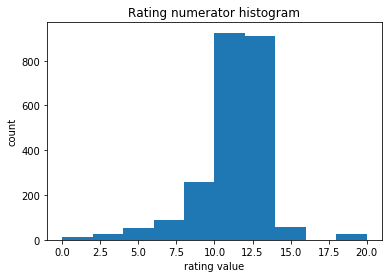

In [87]:
fig, ax = plt.subplots()
plt.hist(twitter_archive_cpy.rating_numerator);
plt.title('Rating numerator histogram');
ax.set_ylabel('count');
ax.set_xlabel('rating value');

In [91]:
tweets_df_cpy.corr()

,retweets,favorites
retweets,1.000000,0.801637
favorites,0.801637,1.000000


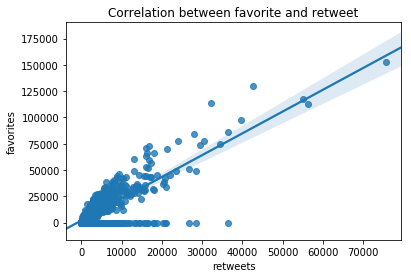

In [97]:
sns.regplot(tweets_df_cpy.retweets, tweets_df_cpy.favorites);
plt.title('Correlation between favorite and retweet');

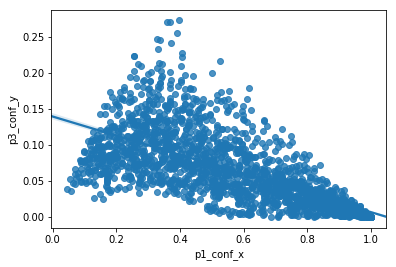

In [100]:
sns.regplot(data=twitter_archive_cpy, x="p1_conf_x", y='p3_conf_y');

In [101]:
twitter_archive_cpy.corr()

,tweet_id,rating_numerator,p1_conf_x,p2_conf_x,p3_conf_x,p1_conf_y,p2_conf_y,p3_conf_y
tweet_id,1.000000,0.477239,0.101821,0.002012,-0.043424,0.101821,0.002012,-0.043424
rating_numerator,0.477239,1.000000,0.088171,-0.009263,-0.017357,0.088171,-0.009263,-0.017357
p1_conf_x,0.101821,0.088171,1.000000,-0.511298,-0.709449,1.000000,-0.511298,-0.709449
p2_conf_x,0.002012,-0.009263,-0.511298,1.000000,0.479027,-0.511298,1.000000,0.479027
p3_conf_x,-0.043424,-0.017357,-0.709449,0.479027,1.000000,-0.709449,0.479027,1.000000
p1_conf_y,0.101821,0.088171,1.000000,-0.511298,-0.709449,1.000000,-0.511298,-0.709449
p2_conf_y,0.002012,-0.009263,-0.511298,1.000000,0.479027,-0.511298,1.000000,0.479027
p3_conf_y,-0.043424,-0.017357,-0.709449,0.479027,1.000000,-0.709449,0.479027,1.000000


In [116]:
twitter_archive_cpy['name'].describe()

count        1541
unique        953
top       Charlie
freq           12
Name: name, dtype: object

In [117]:
twitter_archive_cpy.dog_class.describe()

count        380
unique         4
top       pupper
freq         257
Name: dog_class, dtype: object